# EDA on Telca Co Customer Churn Dataset
## About the Project & Dataset
Telka, a fictional national telecom provider, has been experiencing significant customer churn, especially among users with flexible contracts and digital payment options. As customer acquisition costs continue to rise, retaining existing users has become more important—and more cost-effective—than ever.
### Dataset Columns
- **customerID**: Unique ID for each customer
- **gender**: Gender of the customer (`Male` or `Female`)
- **SeniorCitizen**: Indicates if the customer is a senior (`1` = Yes, `0` = No)
- **Partner**: Whether the customer has a partner (`Yes` or `No`)
- **Dependents**: Whether the customer has dependents (`Yes` or `No`)
- **tenure**: Number of months the customer has been with the company
- **PhoneService**: Whether the customer has phone service (`Yes` or `No`)
- **MultipleLines**: Has multiple phone lines (`Yes`, `No`, or `No phone service`)
- **InternetService**: Type of internet service (`DSL`, `Fiber optic`, or `No`)
- **OnlineSecurity**: Whether online security is included (`Yes`, `No`, or `No internet service`)
- **OnlineBackup**: Whether online backup is included (`Yes`, `No`, or `No internet service`)
- **DeviceProtection**: Whether device protection is included (`Yes`, `No`, or `No internet service`)
- **TechSupport**: Whether tech support is included (`Yes`, `No`, or `No internet service`)
- **StreamingTV**: Access to streaming TV (`Yes`, `No`, or` No internet service`)
- **StreamingMovies**: Access to streaming movies (`Yes`, `No`, or `No internet service`)
- **Contract**: Type of contract (`Month-to-month`, `One year`, `Two year`)
- **PaperlessBilling**: Whether billing is paperless (`Yes` or `No`)
- **PaymentMethod**: Method of payment (`Electronic check`, `Mailed check`, etc.)
- **MonthlyCharges**: Monthly amount charged to the customer
- **TotalCharges**: Total amount charged over the tenure
- **Churn**: Target variable — whether the customer churned (`Yes` or `No`)
### References
- [Kaggle Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code)
- [IBM Telco Churn](https://community.ibm.com/community/user/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)

## TL;DR of the EDA Analysis and Insights
### Target Variable: `Churn`
The `Churn` is a binary variable. It indicates whether a customer has churned or not. 

The churn variable is imbalanced. We have a higher number of customers not churning compared to those who churned. Such an imbalance can affect the performance of machine learning models and thus it is important that we account for this in the models we will build.

### Numerical Features
The numerical features in the dataset are:
1. `tenure`
2. `MonthlyCharges`
3. `TotalCharges`
There some preliminary highlight observed through the EDA process. These are:
 - Customers who churn tend to have a **lower** tenure. Basically showing that customers with longer tenures are less likely to churn.
 - Churn is higher among customers whose payment method is by **electronic check** compared to those using automatic payment methods.
 - `TotalCharges` are naturally correlated with `MonthlyCharges` meaning that **low `TotalCharges`** are seen in churners due to shorter customer lifespan.

 ### Categorical Values
 The categorical plots revealed a few insights:
 - Customer with month-to-month contracts churned a lot more than those with one or two-year contracts.
 - Churn is higher in customers using electroning check as a payment method compared to those using automatic payments.

### Outliers and Missing Values
Missing `TotalCharges` values (Count: 11) were removed after converting to numeric. This is a small portion of the data which should not significantly bias the results so they were removed.

The boxplots for numerical values show no significant outliers and as such no further action is required in terms of taming these values.

### Correlation Matrix
Results of the correlation matrix show that:
- There is a strong positive correlation between `tenure` and `TotalCharges`. This is naturally anticipated as longer tenures would likely result in higher total charges.
- `MonthlyCharges` has a moderate positive correlation with `TotalCharges` (0.65) which indicates that customers with higher monthly charges tend to have higher total charges.

### Summary
Some of the observation highlights are as follows:
1. Customer `tenure`, `Contract`, `PaymentMethod` and `InternetService` appear to be strong predictors of Churn.
The target variable, `Churn` is significantly imbalanced.
3. There are no major data quality issues remaining after initial cleaning.


In [21]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# Plot Customisation
%matplotlib inline
sns.set_theme(style = "whitegrid", palette = "pastel")

In [1]:
# Importing the Dataset
df = pd.read_csv('../data/customer_churn.csv', delimiter = ',')

# Preview
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# DataFrame Shape
df.shape

(7043, 21)

In [3]:
# DataFrame Columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# DataFrame datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Converting `TotalCharges` to Numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

# Confirming Change
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [6]:
# Looking at Missing Values in `TotalCharges`
df.loc[df[df['TotalCharges'].isnull()].index, 'TotalCharges']

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [7]:
# Dropping Missing Values
df = df.dropna(subset = 'TotalCharges')

# Confirming Change
df.loc[df[df['TotalCharges'].isnull()].index, 'TotalCharges']

Series([], Name: TotalCharges, dtype: float64)

In [8]:
# Looking for Null & Duplicated Values
print(df.isnull().sum())
print(df.duplicated().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
0


In [9]:
# Categorising Features
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
service_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'TechSupport']
payment_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen']

categorical_features = list(set(service_features + payment_features) - set(binary_features))
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

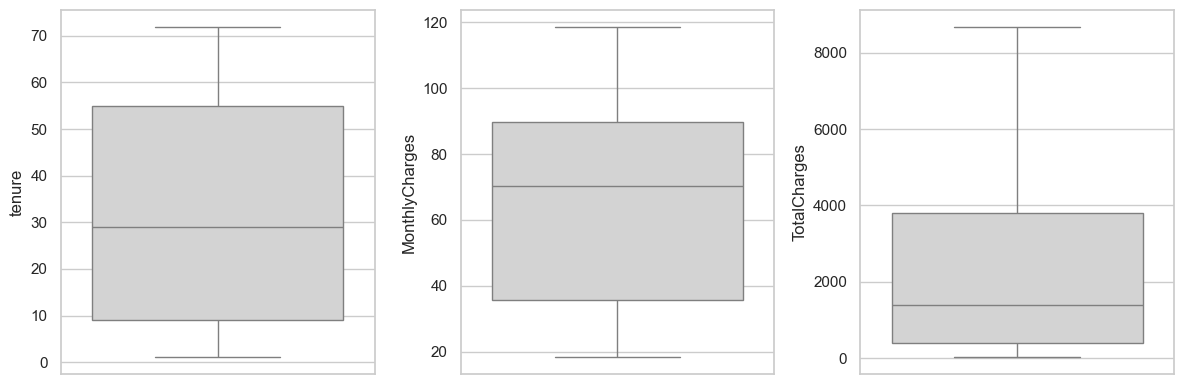

In [10]:
# Comparing Distribution on Numerical Features
plt.figure(figsize = (12, 4))

for i in range(0, len(numeric_features)):
    plt.subplot(1, len(numeric_features), i + 1)
    sns.boxplot(data = df, y = numeric_features[i], color = 'lightgray')
    plt.tight_layout()

# Showing the Plot
plt.show();

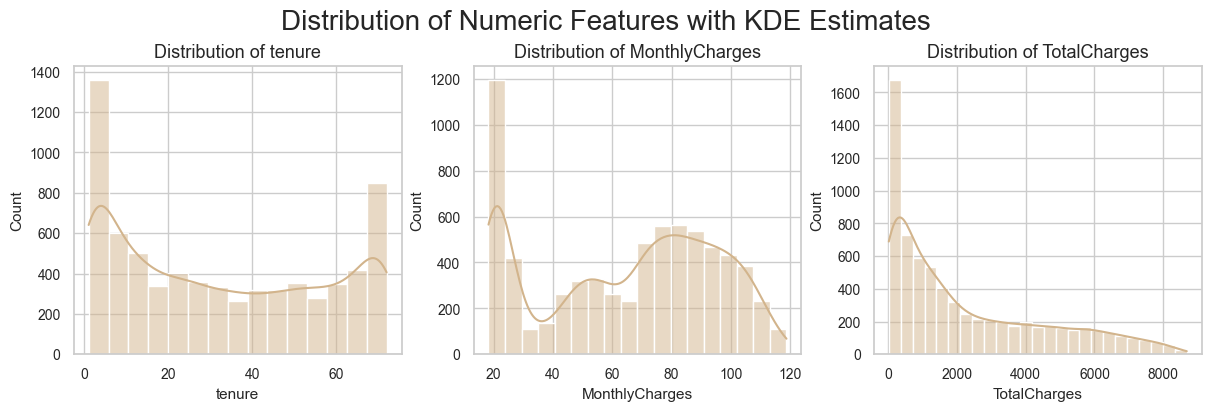

In [11]:
# Distribution of Numeric Features with KDE Estimate
fig, axes = plt.subplots(1, len(numeric_features), figsize = (12, 4), constrained_layout = True)

# Looping over Numerical Features
for i, col in enumerate(numeric_features):
    sns.histplot(data = df, x = col, kde = True, color = 'tan', edgecolor = 'white', linewidth = 1, ax = axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize = 13)
    axes[i].set_xlabel(col, fontsize = 11)
    axes[i].set_ylabel('Count', fontsize = 11)
    axes[i].tick_params(labelsize = 10)

# Adding the Main Title
fig.suptitle('Distribution of Numeric Features with KDE Estimates', fontsize = 20)

plt.show();

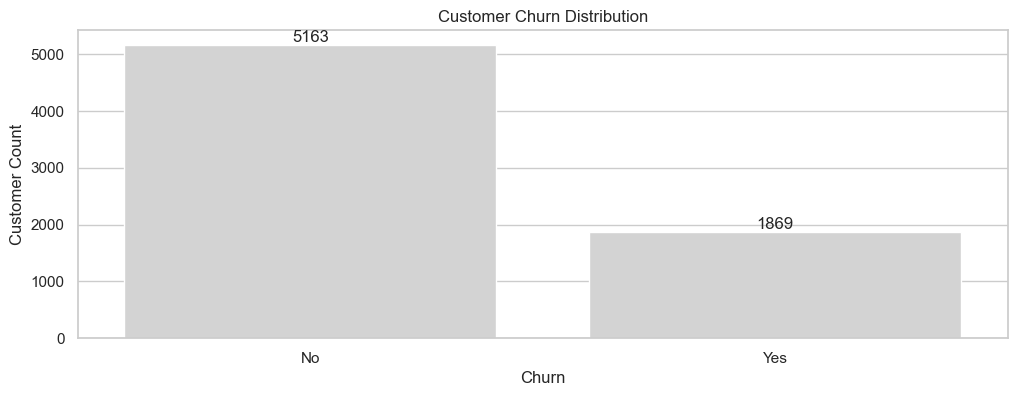

In [12]:
# Churn Distribution
plt.figure(figsize=(12, 4))
ax = sns.countplot(data = df, x = 'Churn', color = 'lightgray')
plt.title('Customer Churn Distribution')
plt.ylabel('Customer Count')

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container)

plt.show();

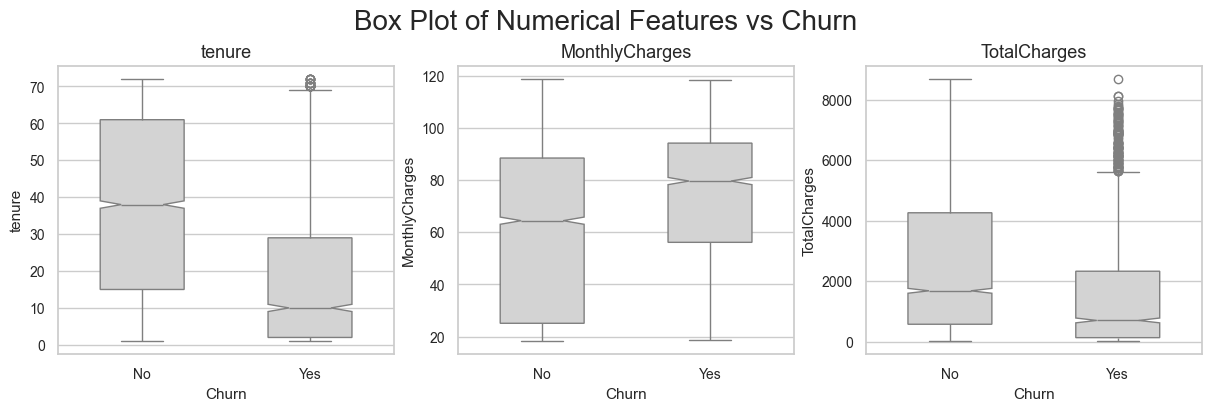

In [13]:
# Numeric Features vs Churn Count
fig, axes = plt.subplots(1, len(numeric_features), figsize = (12, 4), constrained_layout = True)

# Looping over Numeric Features
for i, col in enumerate(numeric_features):
    sns.boxplot(data = df, x = 'Churn', y = col, ax = axes[i], width = 0.5, notch = True, color = 'lightgray')
    axes[i].set_title(f'{col}', fontsize = 13)
    axes[i].set_xlabel('Churn', fontsize = 11)
    axes[i].set_ylabel(col, fontsize = 11)
    axes[i].tick_params(labelsize = 10)

# Adding the Main Title
fig.suptitle('Box Plot of Numerical Features vs Churn', fontsize = 20)

plt.show();

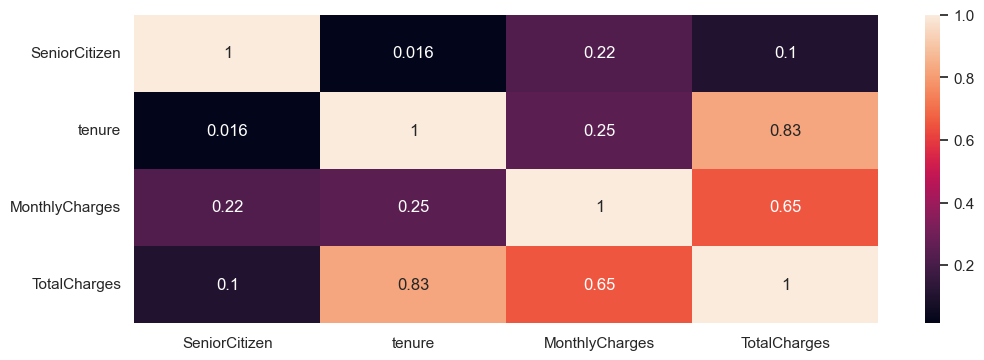

In [14]:
# Heatmap of Numeric Features
plt.figure(figsize = (12, 4))
sns.heatmap(df.corr(numeric_only =  True), annot = True)

plt.show();

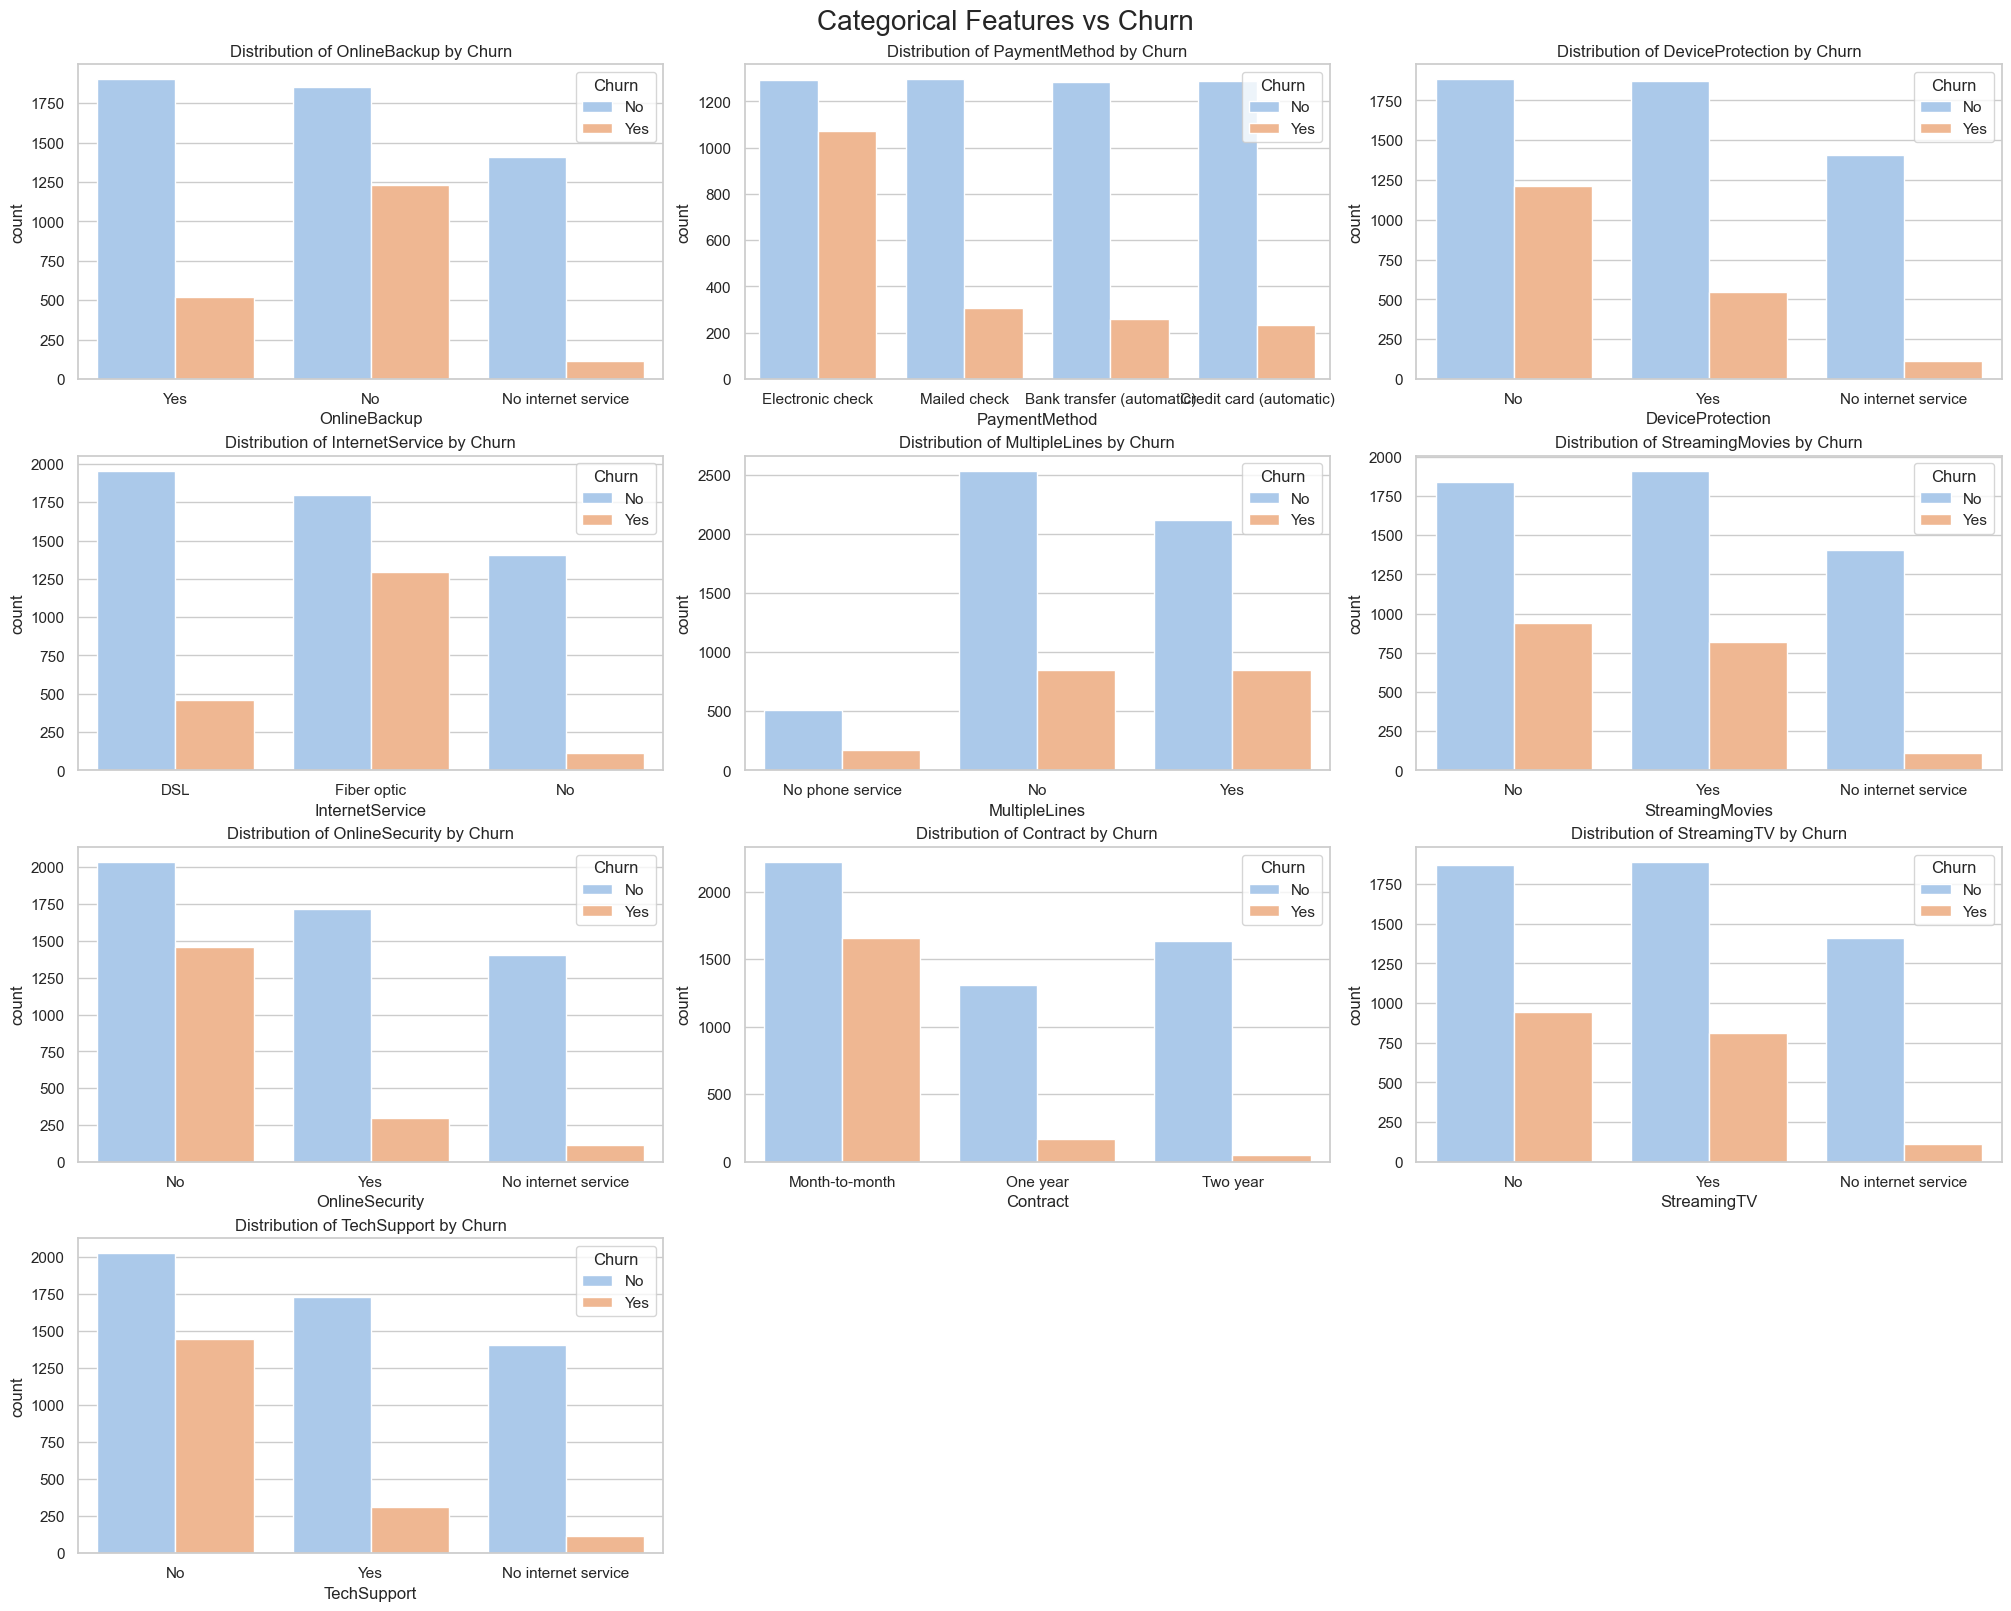

In [15]:
# Looking at Categorical Features vs Churn

n_cols = 3
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize = (20, n_rows * 4), constrained_layout = True)
axes = axes.flatten()

# Plot each categorical feature with 'Churn' as hue
for i, col in enumerate(categorical_features):
    sns.countplot(data = df, x = col, ax = axes[i], hue = 'Churn')
    axes[i].set_title(f'Distribution of {col} by Churn')

# Hide any unused subplots
for j in range(len(categorical_features), len(axes)):
    axes[j].axis('off')

plt.suptitle('Categorical Features vs Churn', fontsize = 20)
plt.show();

In [17]:
# Exporting DataFrame
pd.to_pickle(obj = df, filepath_or_buffer = '../data/analysis_data/eda_customer_churn.pkl')